Link: https://www.kaggle.com/passnyc/data-science-for-good

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('2016 School Explorer.csv')

In [3]:
df.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


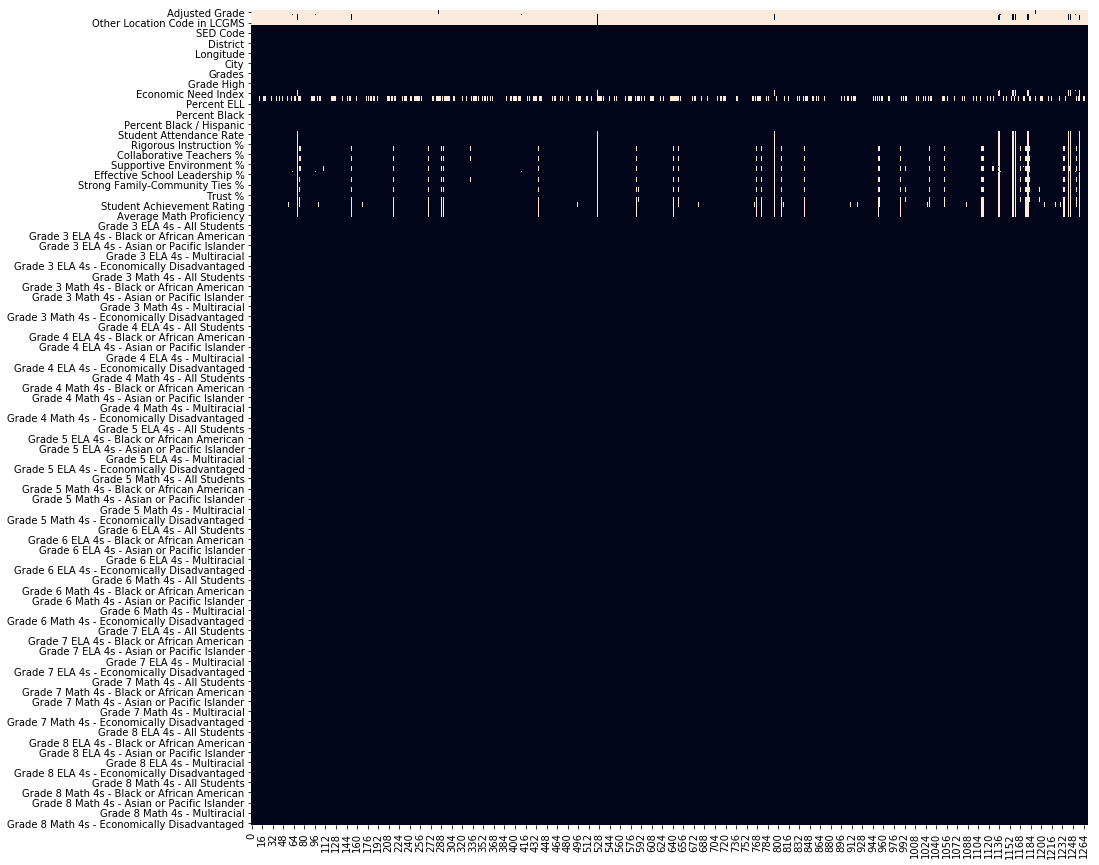

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(df.T.isnull(), cbar=False)

In [5]:
import missingno as msno

#msno.matrix(df)

# Data Cleaning

In [6]:
sns.set(style="darkgrid")

# Sort values by District

df = df.sort_values(by = 'District')

# Clean "School income estimate" by removing all dollar symbols

df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')

# Clean "School income estimate" by removing all commas

df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')

# Remove all rows in "School Income Estimate" and "Economic Need Index" with NaN

df = df[pd.notnull(df['School Income Estimate'])]
df = df[pd.notnull(df['Economic Need Index'])]
df = df[pd.notnull(df['Rigorous Instruction Rating'])]
df = df[pd.notnull(df['Collaborative Teachers Rating'])]
df = df[pd.notnull(df['Supportive Environment Rating'])]
df = df[pd.notnull(df['Effective School Leadership Rating'])]
df = df[pd.notnull(df['Strong Family-Community Ties Rating'])]
df = df[pd.notnull(df['Trust Rating'])]
df = df[pd.notnull(df['Student Achievement Rating'])]



# Change all "School Income Estimate" types to Float

df['School Income Estimate'] = pd.to_numeric(df['School Income Estimate'])

# Change all Percents to Decimals and Floats

def p2f(x):
    return float(x.strip('%'))/100
df['Percent ELL'] = df['Percent ELL'].apply(p2f)
df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].apply(p2f)
df['Percent of Students Chronically Absent'] = df['Percent of Students Chronically Absent'].apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].apply(p2f)
df['Trust %'] = df['Trust %'].apply(p2f)

# Change grading scale froom not, approaching, meeting and exceeding target to 0, 1, 2, 3 respectively.

mapping = {'Not Meeting Target': 0, 'Approaching Target': 1, 'Meeting Target': 2, 'Exceeding Target': 3}
df = df.replace({'Rigorous Instruction Rating': mapping, 'Collaborative Teachers Rating': mapping, 'Supportive Environment Rating': mapping, 'Effective School Leadership Rating': mapping, 'Strong Family-Community Ties Rating': mapping, 'Trust Rating': mapping, 'Student Achievement Rating': mapping})

In [7]:
df.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1188,NaN,NaN,NaN,GIRLS PREPARATORY CHARTER SCHOOL OF NEW YORK,310100860866,84M330,1,40.719870,-73.977376,"442 E HOUSTON ST-RM 312 NEW YORK, NY 10002",...,44,3,0,1,0,0,0,0,0,2
1186,NaN,NaN,NaN,MANHATTAN CHARTER SCHOOL,310100860873,84M320,1,40.718230,-73.984082,"100 ATTORNEY ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
21,NaN,NaN,NaN,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",310100011539,01M539,1,40.719500,-73.979239,"111 COLUMBIA ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
17,NaN,NaN,NaN,NEIGHBORHOOD SCHOOL,310100010363,01M363,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.tail()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
1171,NaN,NaN,NaN,BUSHWICK ASCEND CHARTER SCHOOL,333200860987,84K793,32,40.693686,-73.909030,"751 KNICKERBOCKER AVE BROOKLYN, NY 11221",...,0,0,0,0,0,0,0,0,0,0
1092,NaN,NaN,NaN,P.S. 086 THE IRVINGTON,333200010086,32K086,32,40.700748,-73.917660,"220 IRVING AVE BROOKLYN, NY 11237",...,0,0,0,0,0,0,0,0,0,0
1091,NaN,NaN,NaN,P.S. 075 MAYDA CORTIELLA,333200010075,32K075,32,40.693254,-73.921321,"95 GROVE ST BROOKLYN, NY 11221",...,0,0,0,0,0,0,0,0,0,0
1099,NaN,NaN,NaN,P.S. 274 KOSCIUSKO,333200010274,32K274,32,40.694186,-73.928157,"800 BUSHWICK AVE BROOKLYN, NY 11221",...,0,0,0,0,0,0,0,0,0,0
1096,NaN,NaN,NaN,P.S. 145 ANDREW JACKSON,333200010145,32K145,32,40.701446,-73.932301,"100 NOLL ST BROOKLYN, NY 11206",...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 1096
Columns: 161 entries, Adjusted Grade to Grade 8 Math 4s - Economically Disadvantaged
dtypes: float64(20), int64(130), object(11)
memory usage: 1006.2+ KB


In [10]:
# Remove First Three columns
df = df.drop(columns=['Adjusted Grade', 'New?', 'Other Location Code in LCGMS'])
df.head()

,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",...,0,0,0,0,0,0,0,0,0,0
1188,GIRLS PREPARATORY CHARTER SCHOOL OF NEW YORK,310100860866,84M330,1,40.719870,-73.977376,"442 E HOUSTON ST-RM 312 NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05",...,44,3,0,1,0,0,0,0,0,2
1186,MANHATTAN CHARTER SCHOOL,310100860873,84M320,1,40.718230,-73.984082,"100 ATTORNEY ST NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05",...,0,0,0,0,0,0,0,0,0,0
21,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",310100011539,01M539,1,40.719500,-73.979239,"111 COLUMBIA ST NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05,06,07,08,09,10,11,12",...,0,0,0,0,0,0,0,0,0,0
17,NEIGHBORHOOD SCHOOL,310100010363,01M363,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Reindex
df = df.reset_index()

In [12]:
df = df.drop(columns=['index'])
df.head()

,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",...,0,0,0,0,0,0,0,0,0,0
1,GIRLS PREPARATORY CHARTER SCHOOL OF NEW YORK,310100860866,84M330,1,40.719870,-73.977376,"442 E HOUSTON ST-RM 312 NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05",...,44,3,0,1,0,0,0,0,0,2
2,MANHATTAN CHARTER SCHOOL,310100860873,84M320,1,40.718230,-73.984082,"100 ATTORNEY ST NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05",...,0,0,0,0,0,0,0,0,0,0
3,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",310100011539,01M539,1,40.719500,-73.979239,"111 COLUMBIA ST NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05,06,07,08,09,10,11,12",...,0,0,0,0,0,0,0,0,0,0
4,NEIGHBORHOOD SCHOOL,310100010363,01M363,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Create a Pearson Correlation Matrix for Demographic Variables
student_demographic = df[['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian','Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White']]
student_demographic.corr()

,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White
Economic Need Index,1.000000,-0.891388,0.408446,-0.325332,0.319228,0.563402,0.780150,-0.779731
School Income Estimate,-0.891388,1.000000,-0.347597,0.246096,-0.278477,-0.495459,-0.683467,0.707366
Percent ELL,0.408446,-0.347597,1.000000,0.282074,-0.443366,0.533479,0.028240,-0.241516
Percent Asian,-0.325332,0.246096,0.282074,1.000000,-0.455925,-0.302894,-0.689907,0.112635
Percent Black,0.319228,-0.278477,-0.443366,-0.455925,1.000000,-0.385474,0.625496,-0.492595
Percent Hispanic,0.563402,-0.495459,0.533479,-0.302894,-0.385474,1.000000,0.478654,-0.382532
Percent Black / Hispanic,0.780150,-0.683467,0.028240,-0.689907,0.625496,0.478654,1.000000,-0.792325
Percent White,-0.779731,0.707366,-0.241516,0.112635,-0.492595,-0.382532,-0.792325,1.000000


In [14]:
# Pearson correlation matrix of ENI vs. School performance
school_rating = df[['Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']]
school_rating.corr()

,Economic Need Index,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Economic Need Index,1.000000,-0.217135,0.618113,-0.259403,-0.235427,-0.358539,-0.229820,-0.326378,-0.185525
Student Attendance Rate,-0.217135,1.000000,-0.699301,-0.026649,0.007920,0.087344,0.031323,-0.080103,0.033163
Percent of Students Chronically Absent,0.618113,-0.699301,1.000000,-0.117590,-0.174420,-0.277986,-0.212225,-0.125811,-0.194406
Rigorous Instruction %,-0.259403,-0.026649,-0.117590,1.000000,0.698796,0.615019,0.597544,0.272882,0.534260
Collaborative Teachers %,-0.235427,0.007920,-0.174420,0.698796,1.000000,0.605833,0.908748,0.411484,0.875062
Supportive Environment %,-0.358539,0.087344,-0.277986,0.615019,0.605833,1.000000,0.513870,0.304628,0.584578
Effective School Leadership %,-0.229820,0.031323,-0.212225,0.597544,0.908748,0.513870,1.000000,0.445064,0.878539
Strong Family-Community Ties %,-0.326378,-0.080103,-0.125811,0.272882,0.411484,0.304628,0.445064,1.000000,0.414294
Trust %,-0.185525,0.033163,-0.194406,0.534260,0.875062,0.584578,0.878539,0.414294,1.000000


# Plan Outline

1. Build a Regression model to predict Economic Need Index. Apply multiple optmized regression model and choose the best based on cross validation accuracy.
    - Annotate code
    - Note observations on changes and their effects i.e. features, models, parameters


2. Develop research question: 
- What are the most signifcant indicators for determining the economic need of a school and how do we use them to predict a given school's Economic Need Index?

3. Create Presentation.

In [15]:
df.shape

(795, 158)

In [16]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,785,786,787,788,789,790,791,792,793,794
School Name,P.S. 015 ROBERTO CLEMENTE,GIRLS PREPARATORY CHARTER SCHOOL OF NEW YORK,MANHATTAN CHARTER SCHOOL,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",NEIGHBORHOOD SCHOOL,THE CHILDREN'S WORKSHOP SCHOOL,THE EAST VILLAGE COMMUNITY SCHOOL,EARTH SCHOOL,P.S. 020 ANNA SILVER,P.S. 034 FRANKLIN D. ROOSEVELT,...,P.S. 299 THOMAS WARREN FIELD,P.S. 151 LYNDON B. JOHNSON,P.S. 123 SUYDAM,P.S. 116 ELIZABETH L FARRELL,P.S. 106 EDWARD EVERETT HALE,BUSHWICK ASCEND CHARTER SCHOOL,P.S. 086 THE IRVINGTON,P.S. 075 MAYDA CORTIELLA,P.S. 274 KOSCIUSKO,P.S. 145 ANDREW JACKSON
SED Code,310100010015,310100860866,310100860873,310100011539,310100010363,310100010361,310100010315,310100010364,310100010020,310100010034,...,333200010299,333200010151,333200010123,333200010116,333200010106,333200860987,333200010086,333200010075,333200010274,333200010145
Location Code,01M015,84M330,84M320,01M539,01M363,01M361,01M315,01M364,01M020,01M034,...,32K299,32K151,32K123,32K116,32K106,84K793,32K086,32K075,32K274,32K145
District,1,1,1,1,1,1,1,1,1,1,...,32,32,32,32,32,32,32,32,32,32
Latitude,40.7218,40.7199,40.7182,40.7195,40.7244,40.7277,40.7277,40.7237,40.7213,40.7261,...,40.691,40.6934,40.7039,40.6981,40.6937,40.6937,40.7007,40.6933,40.6942,40.7014
Longitude,-73.9788,-73.9774,-73.9841,-73.9792,-73.9864,-73.9784,-73.9784,-73.9816,-73.9863,-73.975,...,-73.9179,-73.9082,-73.9226,-73.9166,-73.9132,-73.909,-73.9177,-73.9213,-73.9282,-73.9323
Address (Full),"333 E 4TH ST NEW YORK, NY 10009","442 E HOUSTON ST-RM 312 NEW YORK, NY 10002","100 ATTORNEY ST NEW YORK, NY 10002","111 COLUMBIA ST NEW YORK, NY 10002","121 E 3RD ST NEW YORK, NY 10009","610 E 12TH ST NEW YORK, NY 10009","610 E 12TH ST NEW YORK, NY 10009","600 E 6TH ST NEW YORK, NY 10009","166 ESSEX ST NEW YORK, NY 10002","730 E 12TH ST NEW YORK, NY 10009",...,"88 WOODBINE ST BROOKLYN, NY 11221","763 KNICKERBOCKER AVE BROOKLYN, NY 11237","100 IRVING AVE BROOKLYN, NY 11237","515 KNICKERBOCKER AVE BROOKLYN, NY 11237","1328 PUTNAM AVE BROOKLYN, NY 11221","751 KNICKERBOCKER AVE BROOKLYN, NY 11221","220 IRVING AVE BROOKLYN, NY 11237","95 GROVE ST BROOKLYN, NY 11221","800 BUSHWICK AVE BROOKLYN, NY 11221","100 NOLL ST BROOKLYN, NY 11206"
City,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,...,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN
Zip,10009,10002,10002,10002,10009,10009,10009,10009,10002,10009,...,11221,11237,11237,11237,11221,11221,11237,11221,11221,11206
Grades,"PK,0K,01,02,03,04,05","0K,01,02,03,04,05","0K,01,02,03,04,05","0K,01,02,03,04,05,06,07,08,09,10,11,12","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05,06,07,08",...,"PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","0K,01,02,03,04,05","0K,01,02,03,04,05","PK,0K,01,02,03,04,05","0K,01,02,03,04,05,06,07,08,09,10,11,12","0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05"


In [17]:
pd.set_option("display.max_rows",999)

In [18]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,785,786,787,788,789,790,791,792,793,794
School Name,P.S. 015 ROBERTO CLEMENTE,GIRLS PREPARATORY CHARTER SCHOOL OF NEW YORK,MANHATTAN CHARTER SCHOOL,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",NEIGHBORHOOD SCHOOL,THE CHILDREN'S WORKSHOP SCHOOL,THE EAST VILLAGE COMMUNITY SCHOOL,EARTH SCHOOL,P.S. 020 ANNA SILVER,P.S. 034 FRANKLIN D. ROOSEVELT,...,P.S. 299 THOMAS WARREN FIELD,P.S. 151 LYNDON B. JOHNSON,P.S. 123 SUYDAM,P.S. 116 ELIZABETH L FARRELL,P.S. 106 EDWARD EVERETT HALE,BUSHWICK ASCEND CHARTER SCHOOL,P.S. 086 THE IRVINGTON,P.S. 075 MAYDA CORTIELLA,P.S. 274 KOSCIUSKO,P.S. 145 ANDREW JACKSON
SED Code,310100010015,310100860866,310100860873,310100011539,310100010363,310100010361,310100010315,310100010364,310100010020,310100010034,...,333200010299,333200010151,333200010123,333200010116,333200010106,333200860987,333200010086,333200010075,333200010274,333200010145
Location Code,01M015,84M330,84M320,01M539,01M363,01M361,01M315,01M364,01M020,01M034,...,32K299,32K151,32K123,32K116,32K106,84K793,32K086,32K075,32K274,32K145
District,1,1,1,1,1,1,1,1,1,1,...,32,32,32,32,32,32,32,32,32,32
Latitude,40.7218,40.7199,40.7182,40.7195,40.7244,40.7277,40.7277,40.7237,40.7213,40.7261,...,40.691,40.6934,40.7039,40.6981,40.6937,40.6937,40.7007,40.6933,40.6942,40.7014
Longitude,-73.9788,-73.9774,-73.9841,-73.9792,-73.9864,-73.9784,-73.9784,-73.9816,-73.9863,-73.975,...,-73.9179,-73.9082,-73.9226,-73.9166,-73.9132,-73.909,-73.9177,-73.9213,-73.9282,-73.9323
Address (Full),"333 E 4TH ST NEW YORK, NY 10009","442 E HOUSTON ST-RM 312 NEW YORK, NY 10002","100 ATTORNEY ST NEW YORK, NY 10002","111 COLUMBIA ST NEW YORK, NY 10002","121 E 3RD ST NEW YORK, NY 10009","610 E 12TH ST NEW YORK, NY 10009","610 E 12TH ST NEW YORK, NY 10009","600 E 6TH ST NEW YORK, NY 10009","166 ESSEX ST NEW YORK, NY 10002","730 E 12TH ST NEW YORK, NY 10009",...,"88 WOODBINE ST BROOKLYN, NY 11221","763 KNICKERBOCKER AVE BROOKLYN, NY 11237","100 IRVING AVE BROOKLYN, NY 11237","515 KNICKERBOCKER AVE BROOKLYN, NY 11237","1328 PUTNAM AVE BROOKLYN, NY 11221","751 KNICKERBOCKER AVE BROOKLYN, NY 11221","220 IRVING AVE BROOKLYN, NY 11237","95 GROVE ST BROOKLYN, NY 11221","800 BUSHWICK AVE BROOKLYN, NY 11221","100 NOLL ST BROOKLYN, NY 11206"
City,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,...,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN
Zip,10009,10002,10002,10002,10009,10009,10009,10009,10002,10009,...,11221,11237,11237,11237,11221,11221,11237,11221,11221,11206
Grades,"PK,0K,01,02,03,04,05","0K,01,02,03,04,05","0K,01,02,03,04,05","0K,01,02,03,04,05,06,07,08,09,10,11,12","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05,06,07,08",...,"PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","0K,01,02,03,04,05","0K,01,02,03,04,05","PK,0K,01,02,03,04,05","0K,01,02,03,04,05,06,07,08,09,10,11,12","0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05"


In [19]:
df = df.drop(columns=df.loc[:,'Grade 3 ELA - All Students Tested': 'Grade 8 Math 4s - Economically Disadvantaged'].columns.tolist())

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 38 columns):
School Name                               795 non-null object
SED Code                                  795 non-null int64
Location Code                             795 non-null object
District                                  795 non-null int64
Latitude                                  795 non-null float64
Longitude                                 795 non-null float64
Address (Full)                            795 non-null object
City                                      795 non-null object
Zip                                       795 non-null int64
Grades                                    795 non-null object
Grade Low                                 795 non-null object
Grade High                                795 non-null object
Community School?                         795 non-null object
Economic Need Index                       795 non-null float64
School Income Estimate     

In [23]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,785,786,787,788,789,790,791,792,793,794
School Name,P.S. 015 ROBERTO CLEMENTE,GIRLS PREPARATORY CHARTER SCHOOL OF NEW YORK,MANHATTAN CHARTER SCHOOL,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",NEIGHBORHOOD SCHOOL,THE CHILDREN'S WORKSHOP SCHOOL,THE EAST VILLAGE COMMUNITY SCHOOL,EARTH SCHOOL,P.S. 020 ANNA SILVER,P.S. 034 FRANKLIN D. ROOSEVELT,...,P.S. 299 THOMAS WARREN FIELD,P.S. 151 LYNDON B. JOHNSON,P.S. 123 SUYDAM,P.S. 116 ELIZABETH L FARRELL,P.S. 106 EDWARD EVERETT HALE,BUSHWICK ASCEND CHARTER SCHOOL,P.S. 086 THE IRVINGTON,P.S. 075 MAYDA CORTIELLA,P.S. 274 KOSCIUSKO,P.S. 145 ANDREW JACKSON
SED Code,310100010015,310100860866,310100860873,310100011539,310100010363,310100010361,310100010315,310100010364,310100010020,310100010034,...,333200010299,333200010151,333200010123,333200010116,333200010106,333200860987,333200010086,333200010075,333200010274,333200010145
Location Code,01M015,84M330,84M320,01M539,01M363,01M361,01M315,01M364,01M020,01M034,...,32K299,32K151,32K123,32K116,32K106,84K793,32K086,32K075,32K274,32K145
District,1,1,1,1,1,1,1,1,1,1,...,32,32,32,32,32,32,32,32,32,32
Latitude,40.7218,40.7199,40.7182,40.7195,40.7244,40.7277,40.7277,40.7237,40.7213,40.7261,...,40.691,40.6934,40.7039,40.6981,40.6937,40.6937,40.7007,40.6933,40.6942,40.7014
Longitude,-73.9788,-73.9774,-73.9841,-73.9792,-73.9864,-73.9784,-73.9784,-73.9816,-73.9863,-73.975,...,-73.9179,-73.9082,-73.9226,-73.9166,-73.9132,-73.909,-73.9177,-73.9213,-73.9282,-73.9323
Address (Full),"333 E 4TH ST NEW YORK, NY 10009","442 E HOUSTON ST-RM 312 NEW YORK, NY 10002","100 ATTORNEY ST NEW YORK, NY 10002","111 COLUMBIA ST NEW YORK, NY 10002","121 E 3RD ST NEW YORK, NY 10009","610 E 12TH ST NEW YORK, NY 10009","610 E 12TH ST NEW YORK, NY 10009","600 E 6TH ST NEW YORK, NY 10009","166 ESSEX ST NEW YORK, NY 10002","730 E 12TH ST NEW YORK, NY 10009",...,"88 WOODBINE ST BROOKLYN, NY 11221","763 KNICKERBOCKER AVE BROOKLYN, NY 11237","100 IRVING AVE BROOKLYN, NY 11237","515 KNICKERBOCKER AVE BROOKLYN, NY 11237","1328 PUTNAM AVE BROOKLYN, NY 11221","751 KNICKERBOCKER AVE BROOKLYN, NY 11221","220 IRVING AVE BROOKLYN, NY 11237","95 GROVE ST BROOKLYN, NY 11221","800 BUSHWICK AVE BROOKLYN, NY 11221","100 NOLL ST BROOKLYN, NY 11206"
City,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK,...,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN,BROOKLYN
Zip,10009,10002,10002,10002,10009,10009,10009,10009,10002,10009,...,11221,11237,11237,11237,11221,11221,11237,11221,11221,11206
Grades,"PK,0K,01,02,03,04,05","0K,01,02,03,04,05","0K,01,02,03,04,05","0K,01,02,03,04,05,06,07,08,09,10,11,12","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05,06,07,08",...,"PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","0K,01,02,03,04,05","0K,01,02,03,04,05","PK,0K,01,02,03,04,05","0K,01,02,03,04,05,06,07,08,09,10,11,12","0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05"
